<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [82]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
filename = "m4_survey_data.sqlite"

urllib.request.urlretrieve(url, filename)

('m4_survey_data.sqlite', <http.client.HTTPMessage at 0x2509d715070>)

Connect to the database.


In [83]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [84]:
import pandas as pd

## Demo: How to run an sql query


In [85]:
# print how many rows are there in the table named 'master'

QUERY = """
SELECT COUNT(*)
FROM master
"""

# The read_sql_query runs the SQL query and returns the data as a DataFrame
df = pd.read_sql_query(QUERY, conn)
print(df.head())


   COUNT(*)
0     11398


## Demo: How to list all tables


In [86]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [87]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [18]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [19]:
print(df.columns)

Index(['sql'], dtype='object')


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


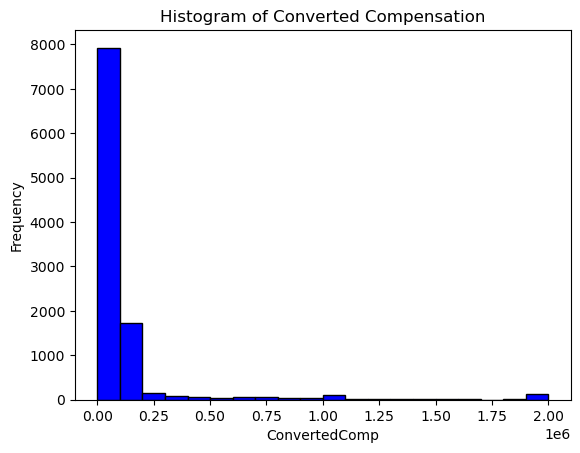

In [20]:
import matplotlib.pyplot as plt

QUERY = """
SELECT ConvertedComp
FROM master
"""

# The read_sql_query runs the SQL query and returns the data as a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Plot histogram
plt.hist(df['ConvertedComp'], bins=20, color='blue', edgecolor='black')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.show()


### Box Plots


Plot a box plot of `Age.`


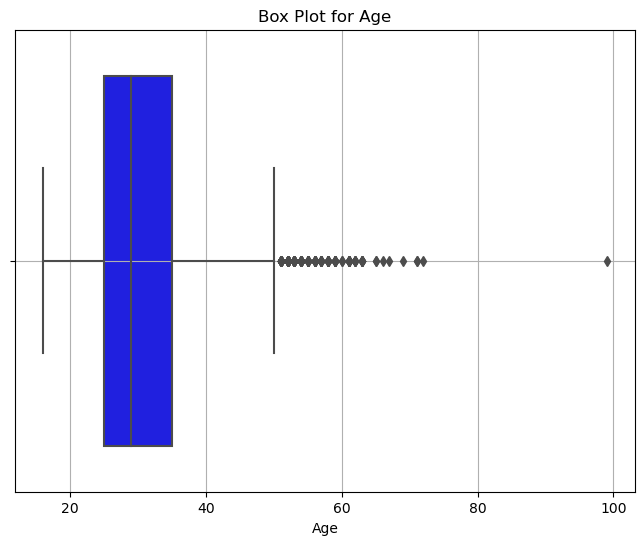

In [22]:
# your code goes here
import seaborn as sns
QUERY = """
SELECT Age
FROM master
"""

# The read_sql_query runs the SQL query and returns the data as a DataFrame
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='blue')
plt.xlabel('Age')
plt.title('Box Plot for Age')
plt.grid(True)
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


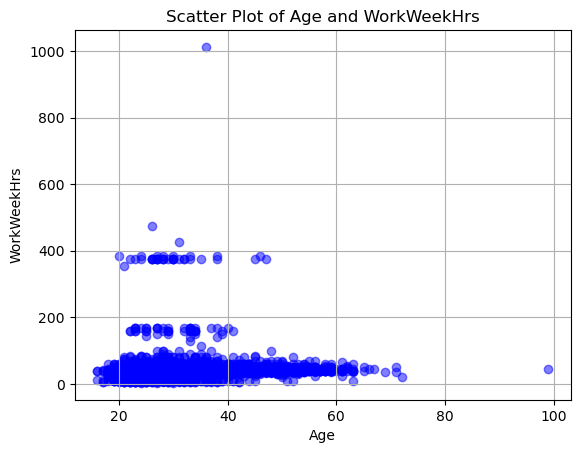

In [23]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.grid(True)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


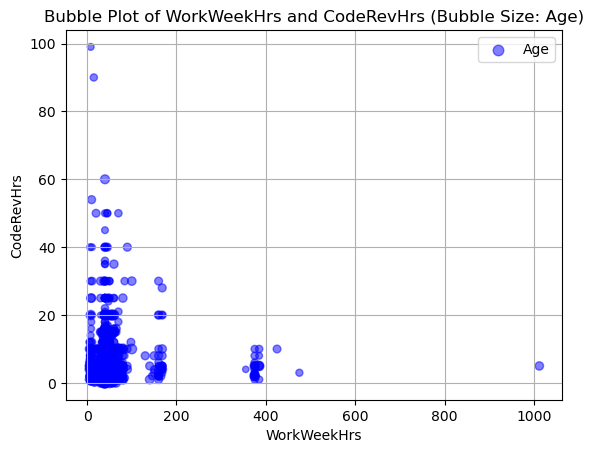

In [24]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df = pd.read_sql_query(QUERY, conn)

# Create the bubble plot
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=df['Age'], alpha=0.5, c='blue', label='Age')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs (Bubble Size: Age)')
plt.legend()
plt.grid(True)
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [59]:
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY, conn)
print(df)

       Respondent DatabaseDesireNextYear
0               4                  MySQL
1               4                 SQLite
2               9             PostgreSQL
3               9                  Redis
4               9                 SQLite
...           ...                    ...
29570       25141          Elasticsearch
29571       25141                MongoDB
29572       25141   Microsoft SQL Server
29573       25141                  Redis
29574       25142             PostgreSQL

[29575 rows x 2 columns]


(-1.0999982627141331,
 1.0999947521964966,
 -1.0999996639960523,
 1.09999854670618)

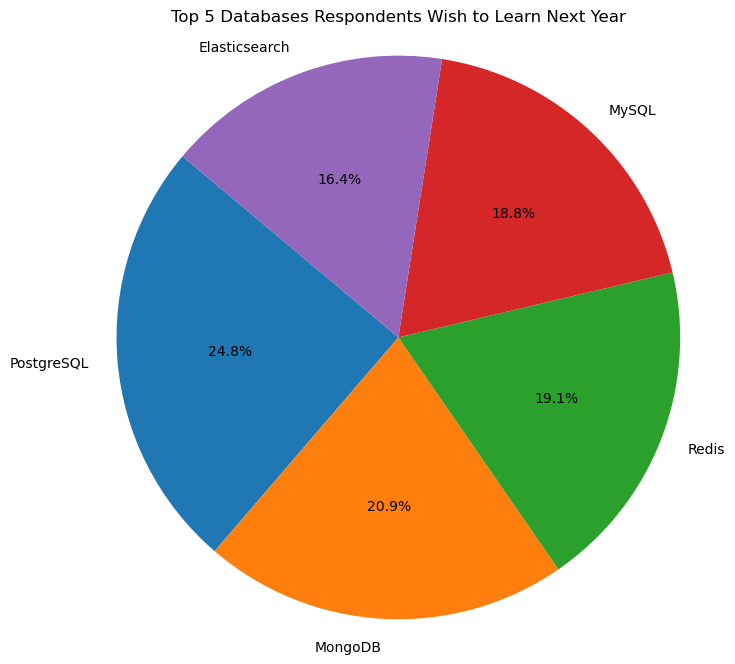

In [63]:
# your code goes here
# Count the occurrences of each database and select the top 5
database_counts = df['DatabaseDesireNextYear'].value_counts().head(5)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(database_counts, labels=database_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


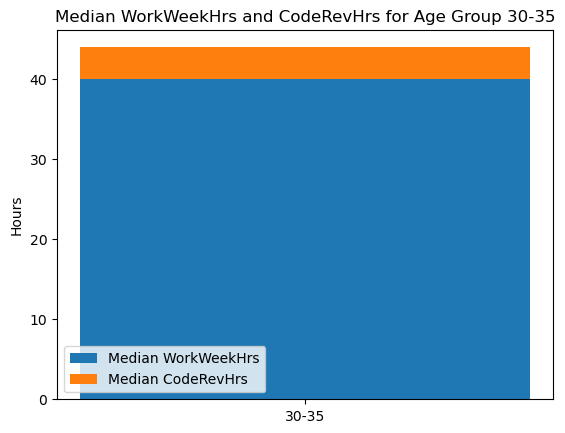

In [58]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
# Step 1: Filter data for age group 30 to 35
filtered_df = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Step 2: Calculate median WorkWeekHrs and CodeRevHrs
median_workweekhrs = filtered_df['WorkWeekHrs'].median()
median_coderevhrs = filtered_df['CodeRevHrs'].median()

# Step 3: Create a stacked bar chart
labels = ['30-35']
workweekhrs_values = [median_workweekhrs]
coderevhrs_values = [median_coderevhrs]

fig, ax = plt.subplots()
ax.bar(labels, workweekhrs_values, label='Median WorkWeekHrs')
ax.bar(labels, coderevhrs_values, bottom=workweekhrs_values, label='Median CodeRevHrs')

ax.set_ylabel('Hours')
ax.set_title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
ax.legend()

plt.show()

In [105]:
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY, conn)
language_counts = df['LanguageDesireNextYear'].value_counts().head(10)
language_counts

JavaScript               6630
HTML/CSS                 5328
Python                   5239
SQL                      5012
TypeScript               4088
C#                       3591
Bash/Shell/PowerShell    3097
Java                     2953
Go                       2759
Kotlin                   1890
Name: LanguageDesireNextYear, dtype: int64

In [74]:
QUERY = """
SELECT *
FROM LanguageWorkedWith
"""
df = pd.read_sql_query(QUERY, conn)
lng_counts = df['LanguageWorkedWith'].value_counts()
lng_counts

JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
Java                     4506
C#                       4288
TypeScript               3232
PHP                      2913
C++                      1946
C                        1578
Ruby                     1149
Go                       1114
Other(s):                 840
Kotlin                    751
Swift                     707
VBA                       628
R                         585
Objective-C               518
Scala                     492
Assembly                  437
Rust                      324
Dart                      237
Elixir                    187
Clojure                   164
F#                        158
WebAssembly               133
Erlang                     98
Name: LanguageWorkedWith, dtype: int64

In [78]:
QUERY = """
SELECT *
FROM DatabaseWorkedWith
"""
df = pd.read_sql_query(QUERY, conn)
db_counts = df['DatabaseWorkedWith'].value_counts()
db_counts


MySQL                   5469
Microsoft SQL Server    4110
PostgreSQL              4097
SQLite                  3248
MongoDB                 3016
Redis                   2508
Elasticsearch           1954
Oracle                  1744
MariaDB                 1709
Firebase                1314
DynamoDB                 831
Other(s):                728
Cassandra                397
Couchbase                250
Name: DatabaseWorkedWith, dtype: int64

In [106]:
QUERY = """SELECT *
FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY, conn)
dbd_counts = df['DatabaseDesireNextYear'].value_counts()
dbd_counts.head(10)


PostgreSQL              4328
MongoDB                 3649
Redis                   3331
MySQL                   3281
Elasticsearch           2856
Microsoft SQL Server    2706
SQLite                  2437
Firebase                1650
MariaDB                 1385
DynamoDB                1044
Name: DatabaseDesireNextYear, dtype: int64

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


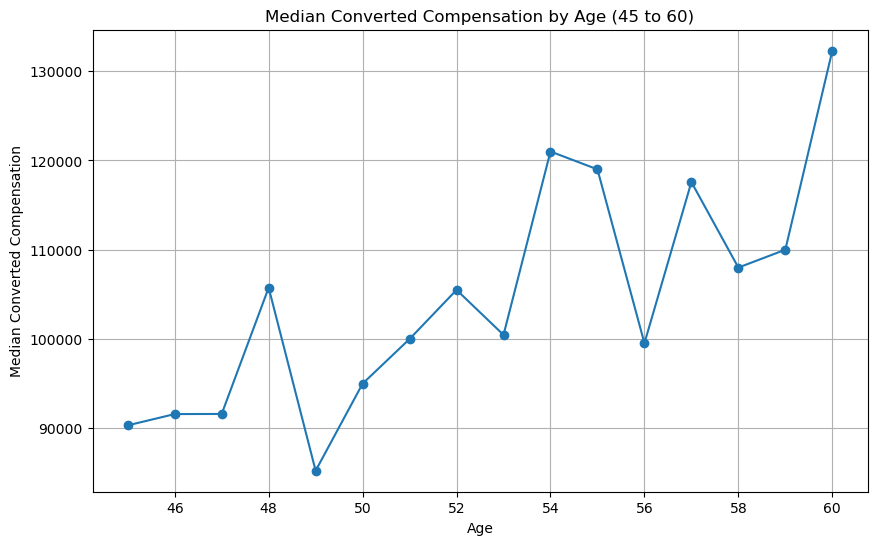

In [99]:
# your code goes here
QUERY = """
SELECT ConvertedComp,Age
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

# Filter rows where Age is between 45 and 60
filtered_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Calculate median ConvertedComp for each age
median_comp_by_age = filtered_df.groupby('Age')['ConvertedComp'].median()

# Create a line plot
plt.figure(figsize=(10, 6))
median_comp_by_age.plot(kind='line', marker='o')
plt.title('Median Converted Compensation by Age (45 to 60)')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.grid(True)
plt.show()



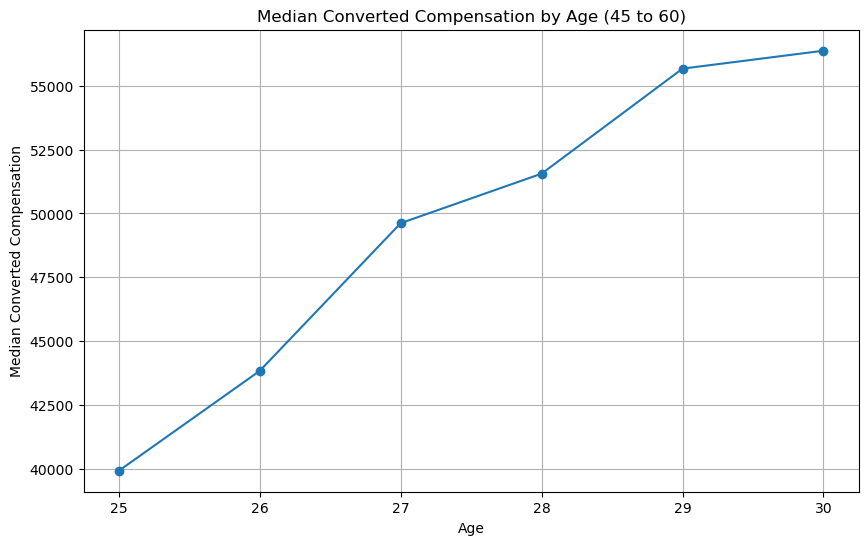

In [100]:
filtered_df = df[(df['Age'] >= 25) & (df['Age'] <= 30)]

# Calculate median ConvertedComp for each age
median_comp_by_age = filtered_df.groupby('Age')['ConvertedComp'].median()

# Create a line plot
plt.figure(figsize=(10, 6))
median_comp_by_age.plot(kind='line', marker='o')
plt.title('Median Converted Compensation by Age (45 to 60)')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.grid(True)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


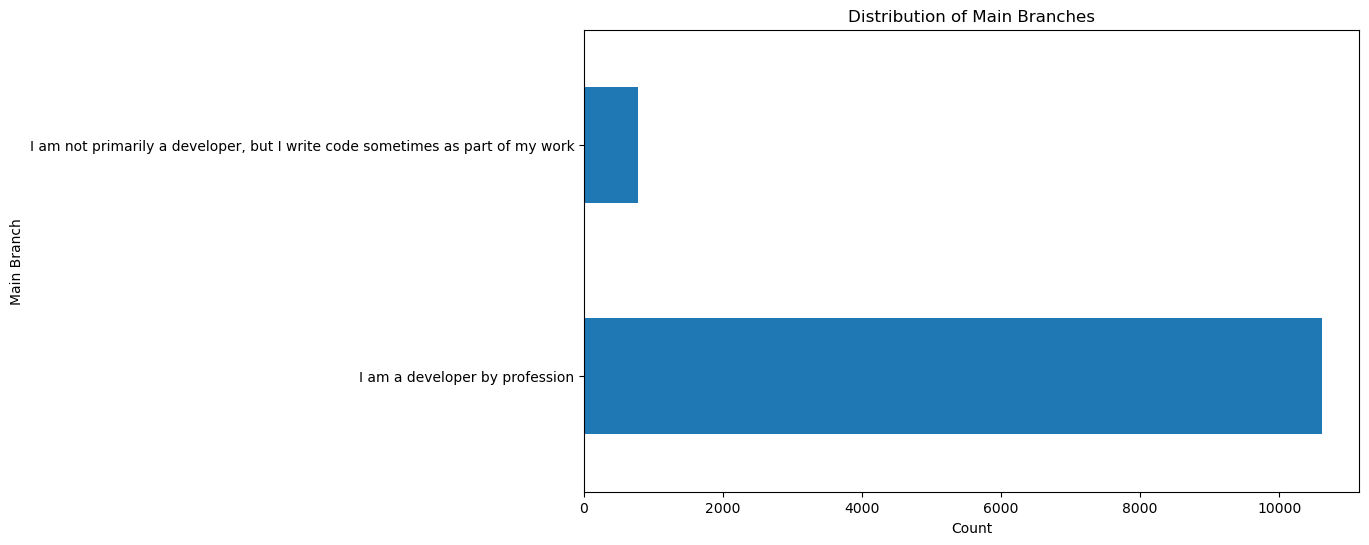

In [91]:
# your code goes here

QUERY = """
SELECT MainBranch
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each main branch
main_branch_counts = df['MainBranch'].value_counts()

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh')
plt.title('Distribution of Main Branches')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.show()

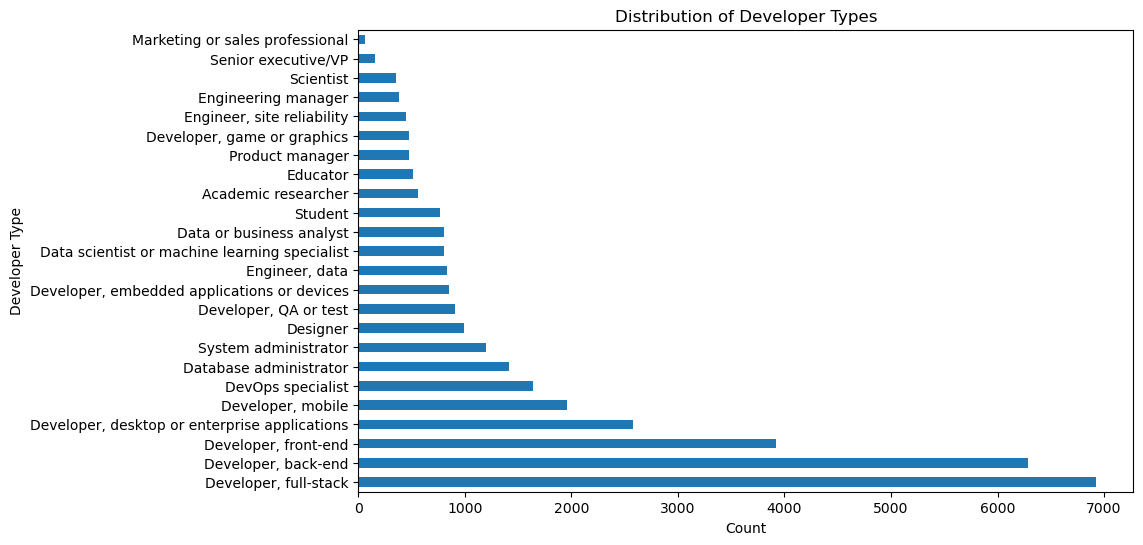

In [102]:
QUERY = """
SELECT *
FROM DevType
"""
df = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each main branch
DevType_counts = df['DevType'].value_counts()

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
DevType_counts.plot(kind='barh')
plt.title('Distribution of Developer Types')
plt.xlabel('Count')
plt.ylabel('Developer Type')
plt.show()

In [96]:
QUERY = """
SELECT *
FROM PlatformWorkedWith
"""
df = pd.read_sql_query(QUERY, conn)
PlatformWorkedWith_counts = df['PlatformWorkedWith'].value_counts()
PlatformWorkedWith_counts

Linux                    5811
Windows                  5563
Docker                   4378
AWS                      3588
Slack                    2786
MacOS                    2718
Android                  2693
Microsoft Azure          1711
Raspberry Pi             1614
WordPress                1490
Google Cloud Platform    1454
iOS                      1438
Heroku                   1268
Kubernetes               1238
Arduino                   914
Other(s):                 329
IBM Cloud or Watson       215
Name: PlatformWorkedWith, dtype: int64

In [108]:
QUERY = """
SELECT *
FROM PlatformDesireNextYear
"""
df = pd.read_sql_query(QUERY, conn)
PlatformDesireNextYear_counts = df['PlatformDesireNextYear'].value_counts()
PlatformDesireNextYear_counts

Linux                    5865
Docker                   5804
AWS                      4442
Windows                  3888
Android                  3231
Kubernetes               3201
MacOS                    2593
Raspberry Pi             2525
Google Cloud Platform    2401
Slack                    2359
Microsoft Azure          2114
iOS                      1987
Arduino                  1399
Heroku                   1121
WordPress                 704
IBM Cloud or Watson       373
Other(s):                 307
Name: PlatformDesireNextYear, dtype: int64

In [97]:
QUERY = """
SELECT *
FROM DevEnviron
"""
df = pd.read_sql_query(QUERY, conn)
DevEnviron_counts = df['DevEnviron'].value_counts()
DevEnviron_counts

Visual Studio Code    6639
Visual Studio         4027
Notepad++             3439
IntelliJ              3094
Vim                   3040
Sublime Text          2638
Android Studio        1691
PyCharm               1448
Eclipse               1373
Atom                  1322
Xcode                 1037
IPython / Jupyter      995
PHPStorm               936
NetBeans               519
Emacs                  448
RStudio                314
RubyMine               170
TextMate                74
Coda                    52
Komodo                  25
Zend                    18
Light Table              7
Name: DevEnviron, dtype: int64

In [103]:

QUERY = """
SELECT *
FROM WebFrameWorkedWith
"""
df = pd.read_sql_query(QUERY, conn)
WebFrameWorkedWith=df['WebFrameWorkedWith'].value_counts() 
WebFrameWorkedWith

jQuery                4629
Angular/Angular.js    3327
React.js              3302
ASP.NET               3042
Express               2028
Spring                1728
Vue.js                1485
Flask                 1186
Django                1176
Laravel                939
Ruby on Rails          856
Other(s):              814
Drupal                 291
Name: WebFrameWorkedWith, dtype: int64

In [109]:
QUERY = """
SELECT *
FROM WebFrameDesireNextYear
"""
df = pd.read_sql_query(QUERY, conn)
WebFrameDesireNextYear=df['WebFrameDesireNextYear'].value_counts() 
WebFrameDesireNextYear

React.js              4714
Vue.js                3143
Angular/Angular.js    3059
ASP.NET               2382
jQuery                2241
Express               1957
Spring                1564
Django                1504
Flask                 1240
Ruby on Rails          970
Laravel                863
Other(s):              762
Drupal                 168
Name: WebFrameDesireNextYear, dtype: int64

Close the database connection.


In [110]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
